                                       **Traffic sign detection**





In [1]:
import zipfile
import os

In [ ]:
data = []
labels = []
classes = 43 
cur_path = os.getcwd() 
for i in range(classes): 
  path = os. path.join(cur_path,'train', str(i)) 
  images = os.listdir(path) 
  for a in images: 
     try: 
        image = Image.open(path + '\\'+ a) 
        image = image.resize((30,30)) 
        image = np.array(image) 
        data.append(image) 
        labels.append(i) 
     except: 
        print("Error loading image") 
data = np.array(data)
labels = np.array(labels)

Use the os.listdir() function to list all 43 folders.
For each folder (class), open the images, read them, and store them in data while storing their class label in labels.

The train folder contains 43 folders each representing a different class. The range of the folder is from 0 to 42. 

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image
import os 
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
data = []    # List to store image data
labels = []  # List to store class labels

classes = 43 
cur_path = os.getcwd() 
for i in range(classes): 
  path = os. path.join(cur_path,'train', str(i)) 
  images = os.listdir(path) 
  for a in images: 
     try: 
        image = Image.open(path + '\\'+ a) 
        image = image.resize((30,30)) 
        image = np.array(image) 
        data.append(image) 
        labels.append(i) 
     except: 
        print("Error loading image") 
data = np.array(data)
labels = np.array(labels)


In [34]:
!pip install matplotlib pandas


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 2.1 MB/s eta 0:00:04
   ----- ---------------------------------- 1.0/7.8 MB 3.1 MB/s eta 0:00:03
   -------- ------------------------------- 1.6/7.8 MB 2.6 MB/s eta 0:00:03
   ------------- -------------------------- 2.6/7.8 MB 3.1 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/7.8 MB 3.5 MB/s eta 0:00:02
   --------------------- ------------------ 4.2/7.8 MB 3.4 MB/s eta 0:00:02
   ------------------------ --------------- 4.7/7.8 MB 3.3 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/7.8 MB 3.2 MB/s eta 0:00:01
   ----------------------------- ---------- 5.8/7.8 MB 3.1 MB/s eta 0:00:01
   --------------------------------- ------ 6.6/7.8 MB 3.1 MB/s eta 0:00:01
   ---------------------------------- ----- 6.8/7.8 MB 3.0 MB/s eta 0:00:01
   ----------------------------

In [39]:
pip install scikit-learn


✅ Reads all 43 folders (0 to 42)
✅ Opens each image, resizes it to 32x32 pixels
✅ Stores the image data in data
✅ Stores the folder number as the label in labels
✅ Converts everything into NumPy arrays for easy model training

In [6]:
import numpy as np

In [48]:


print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


Data shape: (39209, 30, 30, 3)
Labels shape: (39209,)


The shape of data is (39209, 30, 30, 3) which means that there are 39,209 images of size 30×30 pixels and the last 3 means the data contains colored images (RGB value).

In [8]:
import matplotlib.pyplot as plt


In [51]:
!pip install opencv-python


   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
    --------------------------------------- 0.8/39.5 MB 2.2 MB/s eta 0:00:18
   - -------------------------------------- 1.0/39.5 MB 1.9 MB/s eta 0:00:20
   - -------------------------------------- 1.6/39.5 MB 1.9 MB/s eta 0:00:20
   -- ------------------------------------- 2.1/39.5 MB 2.1 MB/s eta 0:00:18
   -- ------------------------------------- 2.9/39.5 MB 2.2 MB/s eta 0:00:17
   --- ------------------------------------ 3.7/39.5 MB 2.6 MB/s eta 0:00:14
   ---- ----------------------------------- 4.5/39.5 MB 2.7 MB/s eta 0:00:14
   ----- ---------------------------------- 5.5/39.5 MB 2.9 MB/s eta 0:00:12
   ------ --------------------------------- 6.0/39.5 MB 3.0 MB/s eta 0:00:12
   ------ --------------------------------- 6.8/39.5 MB 3.0 MB/s eta 0:00:11
   ------- ---------

In [52]:
import cv2

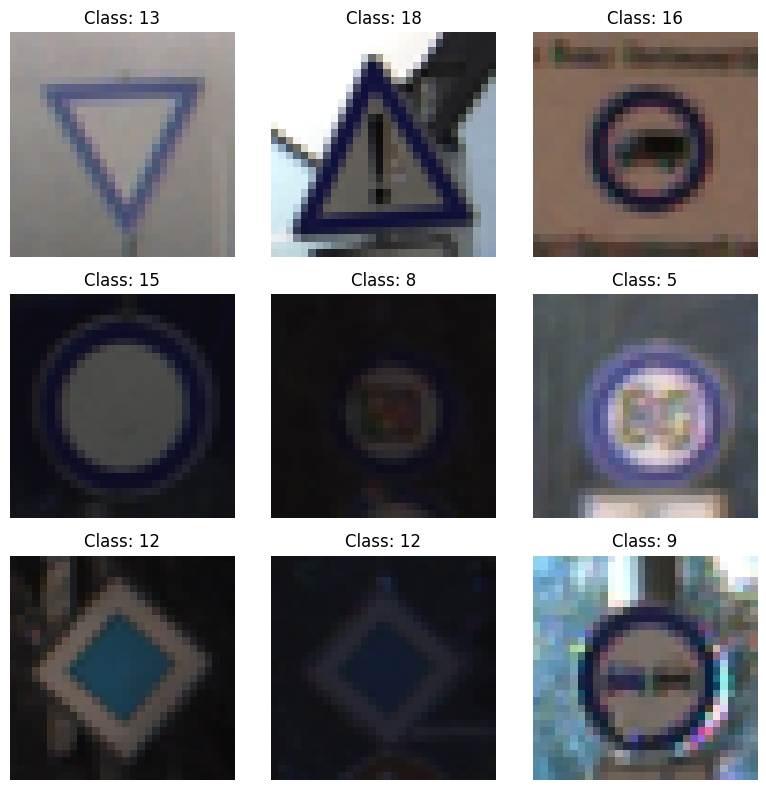

In [53]:
# Show random images with labels
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.flatten()

for i in range(9):
    index = np.random.randint(len(data))
    axes[i].imshow(cv2.cvtColor(data[index], cv2.COLOR_BGR2RGB))
    axes[i].set_title(f"Class: {labels[index]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


With the sklearn package, we use the train_test_split() method to split training and testing data.

From the keras.utils package, we use to_categorical method to convert the labels present in y_train and t_test into one-hot encoding.

In [54]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [55]:
from tensorflow.keras.utils import to_categorical

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)




In [56]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


C:\Users\SHYAMA\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model with Adam optimizer which performs well and loss is “categorical_crossentropy” because we have multiple classes to categorise.

In [57]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [58]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 63s 61ms/step - accuracy: 0.3400 - loss: 3.0475 - val_accuracy: 0.8656 - val_loss: 0.5465
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - accuracy: 0.7664 - loss: 0.8168 - val_accuracy: 0.9368 - val_loss: 0.2394
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 69s 70ms/step - accuracy: 0.8616 - loss: 0.4722 - val_accuracy: 0.9494 - val_loss: 0.2060
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 60s 61ms/step - accuracy: 0.8837 - loss: 0.3989 - val_accuracy: 0.9600 - val_loss: 0.1441
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 86s 65ms/step - accuracy: 0.9035 - loss: 0.3338 - val_accuracy: 0.9686 - val_loss: 0.1143
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 57s 58ms/step - accuracy: 0.9177 - loss: 0.2881 - val_accuracy: 0.9745 - val_loss: 0.0993
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 63s 64ms/step - accuracy: 0.9204 - loss: 0.2738 - val_accuracy: 0.9725 - val_loss: 0.0966
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 62s 63ms/step - accuracy: 0.9281 - loss: 0.2563 - 

In [59]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [60]:
acc = history.history['accuracy']

In [61]:
val_acc = history.history['val_accuracy']

In [62]:
loss = history.history['loss']

In [63]:
val_loss =history.history['val_loss']

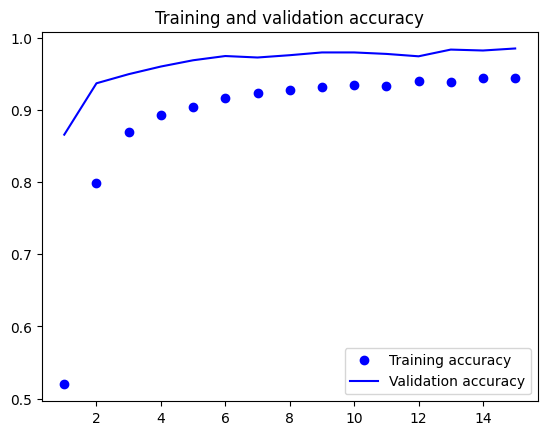

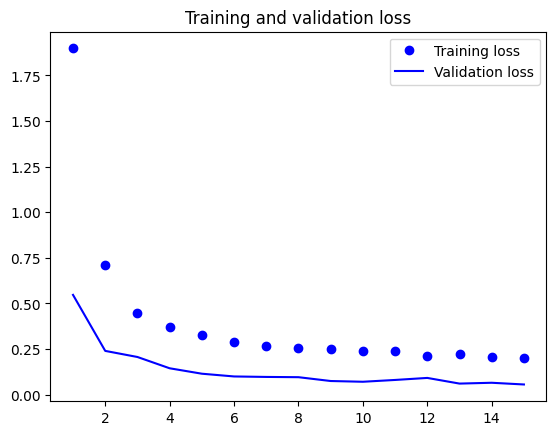

In [64]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

1.Training and Validation Accuracy (First Graph)
The training accuracy (dots) starts low and rapidly increases, reaching nearly 100%.

The validation accuracy (solid line) follows a similar trend and also approaches 1.0 (100%).

This suggests that your model is learning well and is highly accurate on both training and validation data.

2. Training and Validation Loss (Second Graph)
The training loss (dots) starts high but quickly drops to near zero.

The validation loss (solid line) also decreases and remains low.

A decreasing loss means the model is minimizing errors over time.

Possible Interpretations:
No Overfitting: Since validation accuracy remains high and validation loss stays low, your model does not seem to be overfitting.

Very High Accuracy: If your dataset is large and diverse, such high accuracy could be a good sign. But if it's small or lacks variation, your model might be too "memorized" to generalize well.



In [67]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have test labels (y_test) and model predictions (y_pred)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels if using softmax
y_test_classes = np.argmax(y_test, axis=1)  # If y_test is one-hot encoded


246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [68]:
print(classification_report(y_test_classes, y_pred_classes))


              precision    recall  f1-score   support

           0       1.00      0.87      0.93        38
           1       0.99      0.98      0.98       496
           2       0.97      0.98      0.97       450
           3       0.99      0.98      0.99       280
           4       0.99      0.99      0.99       418
           5       0.96      0.97      0.96       364
           6       0.95      1.00      0.98        59
           7       0.99      0.99      0.99       278
           8       0.98      0.98      0.98       301
           9       0.99      0.99      0.99       268
          10       0.99      0.99      0.99       370
          11       0.97      0.99      0.98       236
          12       0.98      1.00      0.99       450
          13       1.00      1.00      1.00       452
          14       0.99      0.99      0.99       162
          15       0.99      0.99      0.99       120
          16       1.00      1.00      1.00        90
          17       1.00    

In [66]:
pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [69]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9914 - loss: 0.0316
246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9855 - loss: 0.0571
Training Accuracy: 0.9916
Test Accuracy: 0.9850


In [70]:
import numpy as np

import numpy as np

# Convert all elements to tuples explicitly
train_set = set(map(tuple, X_train.reshape(X_train.shape[0], -1)))
test_set = set(map(tuple, X_test.reshape(X_test.shape[0], -1)))

# Check for overlap
leakage_count = len(train_set.intersection(test_set))
print(f"Overlapping test samples in training: {leakage_count}")




Overlapping test samples in training: 0


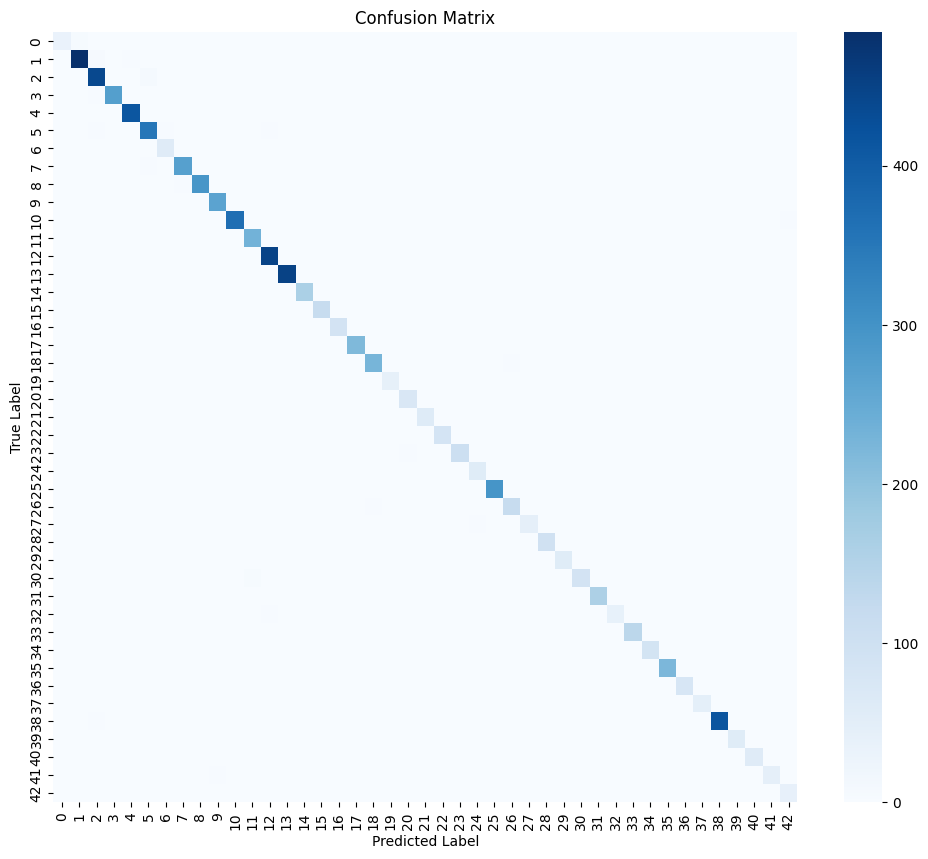

In [71]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_classes, y_pred_classes)
cm = np.array(cm, dtype=np.int32)  # Convert to NumPy for efficiency

plt.figure(figsize=(12, 10))  # Make it larger
sns.heatmap(cm, annot=False, cmap='Blues')  # Disable annotations for speed
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


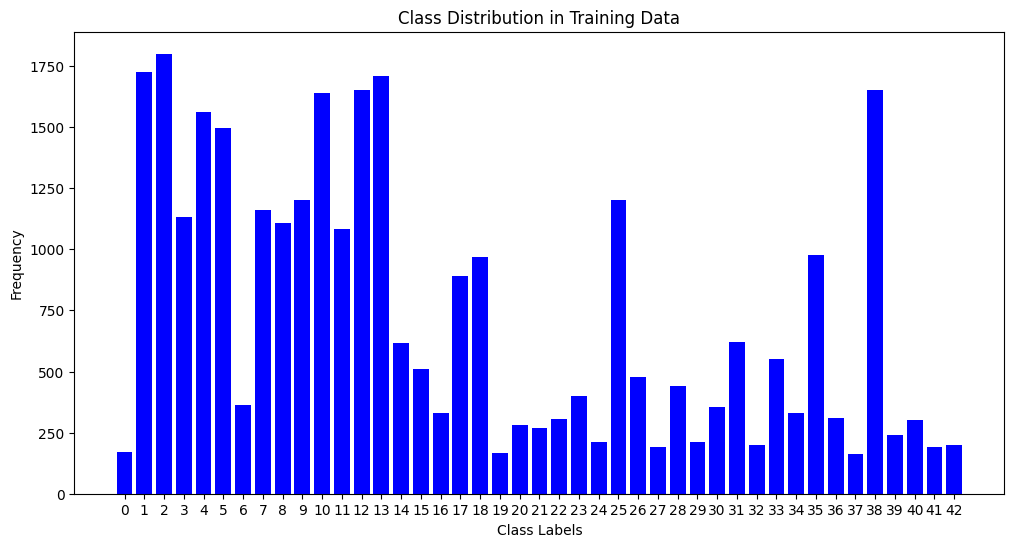

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert one-hot encoded y_train to class labels
y_train_labels = np.argmax(y_train, axis=1)  # Converts (61274, 43) → (61274,)

# Count occurrences of each class label
class_counts = pd.Series(y_train_labels).value_counts().sort_index()

# Plot class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_counts.index, class_counts.values, color='blue')

# Formatting
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.title("Class Distribution in Training Data")
plt.xticks(class_counts.index)  # Ensure all class labels appear

plt.show()


In [73]:
y_test=pd.read_csv('Test.csv')

In [74]:
y_test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


Test the model in new data

In [77]:
from PIL import Image
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
   image = Image.open(img)
   image = image.resize((30,30))
   data.append(np.array(image))
X_test=np.array(data)
pred = model.predict(X_test)


395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step


In [79]:

#Accuracy with the test data
from sklearn.metrics import accuracy_score
#convert probabilities to class labels (if necessary)
pred_labels = np.argmax(pred, axis=1)  # Get the index of max probability

# Now compute accuracy
print(accuracy_score(labels, pred_labels))

0.947347585114806


In [1]:
model.save('traffic_classifier.h5')

NameError: name 'model' is not defined

In [3]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
# Load the trained model to classify signs
from keras.models import load_model


In [2]:
pip install pillow


   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.6 MB 3.4 MB/s eta 0:00:01
   --------------- ------------------------ 1.0/2.6 MB 3.3 MB/s eta 0:00:01
   --------------------------- ------------ 1.8/2.6 MB 3.5 MB/s eta 0:00:01
   ----------------------------------- ---- 2.4/2.6 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
model = load_model('traffic_classifier.h5')

In [13]:
pip show tensorflow


Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\SHYAMA\anaconda3\Lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, termcolor, typing-extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [9]:
!pip install keras tensorflow


tkinter: Used to create the GUI application.

filedialog: Allows the user to select an image file from their system.

ImageTk, Image (from PIL): Helps in loading and displaying images in the GUI.

numpy: Used for handling image data as numerical arrays.

load_model: Loads the pre-trained traffic sign classification model.

In [5]:
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',
            3:'Speed limit (50km/h)',
            4:'Speed limit (60km/h)',
            5:'Speed limit (70km/h)',
            6:'Speed limit (80km/h)',
            7:'End of speed limit (80km/h)',
            8:'Speed limit (100km/h)',
            9:'Speed limit (120km/h)',
            10:'No passing',
            11:'No passing veh over 3.5 tons',
            12:'Right-of-way at intersection',
            13:'Priority road',
            14:'Yield',
            15:'Stop',
            16:'No vehicles',
            17:'Veh > 3.5 tons prohibited',
            18:'No entry',
            19:'General caution',
            20:'Dangerous curve left',
            21:'Dangerous curve right',
            22:'Double curve',
            23:'Bumpy road',
            24:'Slippery road',
            25:'Road narrows on the right',
            26:'Road work',
            27:'Traffic signals',
            28:'Pedestrians',
            29:'Children crossing',
            30:'Bicycles crossing',
            31:'Beware of ice/snow',
            32:'Wild animals crossing',
            33:'End speed + passing limits',
            34:'Turn right ahead',
            35:'Turn left ahead',
            36:'Ahead only',
            37:'Go straight or right',
            38:'Go straight or left',
            39:'Keep right',
            40:'Keep left',
            41:'Roundabout mandatory',
            42:'End of no passing',
            43:'End no passing veh > 3.5 tons' }

In [6]:
print(model.summary()) 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,253 (946.30 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


tk.Tk(): Creates the main window of the application.

geometry('800x600'): Sets the window size (width: 800px, height: 600px).

title('Traffic Sign Classification'): Sets the title of the window.

configure(background='#CDCDCD'): Sets the background color of the window.

In [13]:
import numpy as np

In [17]:
top = tk.Tk()
top.geometry('800x600')
top.title('Traffic Sign Classification')
top.configure(background='#CDCDCD')

# Heading Label
heading = tk.Label(top, text="Know Your Traffic Sign", pady=20, font=('Arial', 20, 'bold'))
heading.configure(background='#CDCDCD', foreground='#364156')
heading.pack()

# Label for displaying prediction
label = tk.Label(top, background='#CDCDCD', font=('Arial', 15, 'bold'))
label.pack(side=tk.BOTTOM, expand=True)

# Label for image
sign_image = tk.Label(top)
sign_image.pack(side=tk.BOTTOM, expand=True)

# Global variable for image reference
uploaded_image = None

# Function to classify image
def classify(file_path):
    image = Image.open(file_path)
    image = image.resize((30, 30))  # Resize to match model input
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    
    pred = np.argmax(model.predict(image), axis=-1)[0]  # Corrected prediction method
    sign = classes.get(pred + 1, "Unknown Sign")  # Get class label
    
    label.config(text=sign, foreground='#011638')
    print(sign)

# Function to display classify button
def show_classify_button(file_path):
    classify_b = tk.Button(top, text="Classify Image", command=lambda: classify(file_path), padx=10, pady=5)
    classify_b.configure(background='#364156', foreground='white', font=('Arial', 10, 'bold'))
    classify_b.pack(pady=10)

# Function to upload an image
def upload_image():
    global uploaded_image
    file_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.png;*.jpg;*.jpeg")])

    if file_path:
        uploaded = Image.open(file_path)
        uploaded = uploaded.resize((200, 200), Image.LANCZOS)  # Increase the size

        uploaded_image = ImageTk.PhotoImage(uploaded)  # Store reference

        # Ensure the label has enough space to display the larger image
        sign_image.config(image=uploaded_image, width=200, height=200)
        sign_image.image = uploaded_image
        label.config(text='')  # Clear previous prediction

        show_classify_button(file_path)

# Upload Button
upload = tk.Button(top, text="Upload an Image", command=upload_image, padx=10, pady=5)
upload.configure(background='#364156', foreground='white', font=('Arial', 10, 'bold'))
upload.pack(pady=20)

top.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Speed limit (20km/h)


Label(top, background='#CDCDCD', font=('arial',15,'bold')): Creates a label to display the predicted traffic sign name.

sign_image = Label(top): Creates an empty label to later display the uploaded image.

Loads the Image:

image = Image.open(file_path): Opens the selected image.

image = image.resize((30,30)): Resizes the image to 30x30 pixels (as required by the model).

Prepares the Image for Prediction:

image = numpy.expand_dims(image, axis=0): Expands the dimensions to match the model's input format.

image = numpy.array(image): Converts the image into a NumPy array.

Model Prediction:

pred = model.predict_classes([image])[0]: Predicts the class ID for the image.

sign = classes[pred+1]: Maps the predicted class ID to the traffic sign name.

Displays Prediction:

label.configure(foreground='#011638', text=sign): Updates the label to show the predicted traffic sign name.

This function creates a button (Classify Image) that, when clicked, calls the classify() function.

relx=0.79, rely=0.46: Places the button at (79%, 46%) of the window.

Creates an "Upload an image" button that calls upload_image().

pack(side=BOTTOM, pady=50): Places it at the bottom with some spacing.



sign_image (image preview) appears above the "Upload" button.

label (predicted sign name) is above the image.

import numpy as np

Creates a title label for the application.

Places it at the top using .pack().